# 패키지 설치 및 드라이브 마운트

In [1]:
!pip install pillow==6.2.2
!pip install tqdm
!pip install terminaltables

패키지 설치 시 `RESTART RUNTIME` 버튼이 나온다면 한 번 RESTART 시켜주고 다시 실행한다.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import os
import cv2
from google.colab.patches import cv2_imshow
os.chdir('/content/gdrive/My Drive/mask-detection-yolov3')
os.listdir('/content/gdrive/My Drive/mask-detection-yolov3')

['validate.py',
 '.gitignore',
 'image_detect.py',
 'models.py',
 'cam_detect.py',
 'requirements.txt',
 'train.py',
 'video_detect.py',
 'data',
 '.idea',
 'weights',
 'config',
 '.git',
 'testing',
 'utils',
 '__pycache__',
 'checkpoints',
 'mask yolov3 training.ipynb',
 'mask yolov3 testing.ipynb']

# fine-tuning, 1 epoch 후 image_detect.py 실행

In [4]:
'''
yolov3_ckpt_0.pth는 1 epoch 후의 model을 저장한 것이다.
image_detect.py는 image에서 object를 찾고 그 결과를 저장하는 코드이다.
'''

!python image_detect.py --weights_path checkpoints/yolov3_ckpt_0.pth

Namespace(class_path='data/mask_dataset.names', conf_thres=0.8, frame_size=416, input_file_path='testing/input/images', model_def='config/yolov3_mask.cfg', nms_thres=0.3, output_path='testing/output/images', weights_path='checkpoints/yolov3_ckpt_0.pth')

Performing object detection:

img.jpg_______
3 Detection found
Done....

image2.jpg_______
3 Detection found
Done....

images.jpg_______
1 Detection found
Done....

2QJR.jpg_______
Done....

1582552493.jpg_______
1 Detection found
Done....

images21.jpg_______
Done....


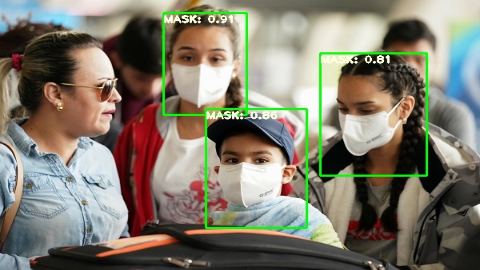

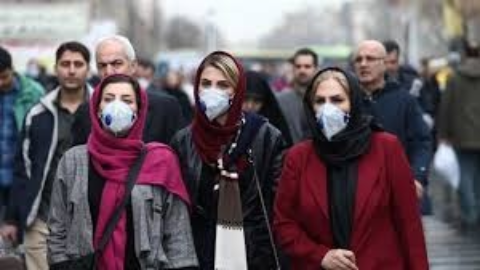

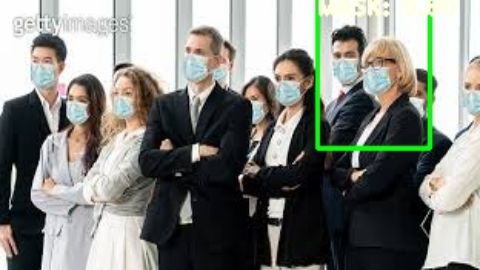

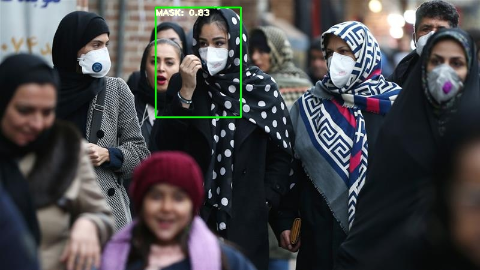

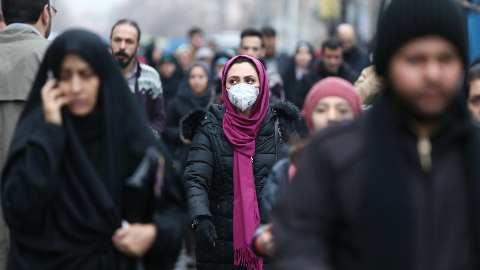

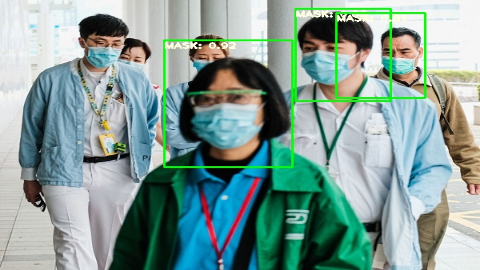

In [5]:
output_path = './testing/output/images'
for img in os.listdir(output_path):
    img_raw = cv2.imread(os.path.join(output_path, img))
    img_raw = cv2.resize(img_raw, (480, 270))  
    cv2_imshow(img_raw)

# fine-tuning, 35 epoch 후 image_detect.py 실행

In [6]:
'''
yolov3_ckpt_{}.pth에서 {}에 학습하고 저장한 epoch 수를 넣어주면 된다.
'''
!python image_detect.py --weights_path checkpoints/yolov3_ckpt_35.pth

Namespace(class_path='data/mask_dataset.names', conf_thres=0.8, frame_size=416, input_file_path='testing/input/images', model_def='config/yolov3_mask.cfg', nms_thres=0.3, output_path='testing/output/images', weights_path='checkpoints/yolov3_ckpt_35.pth')

Performing object detection:

img.jpg_______
5 Detection found
Done....

image2.jpg_______
6 Detection found
Done....

images.jpg_______
10 Detection found
Done....

2QJR.jpg_______
11 Detection found
Done....

1582552493.jpg_______
9 Detection found
Done....

images21.jpg_______
8 Detection found
Done....


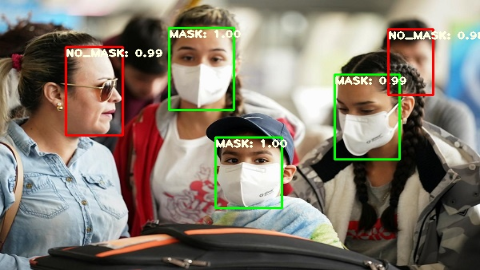

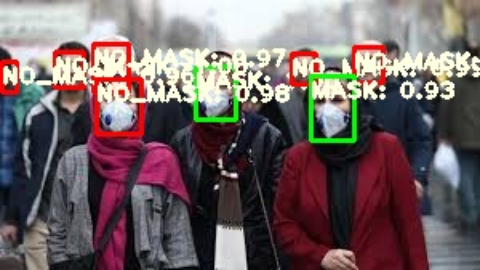

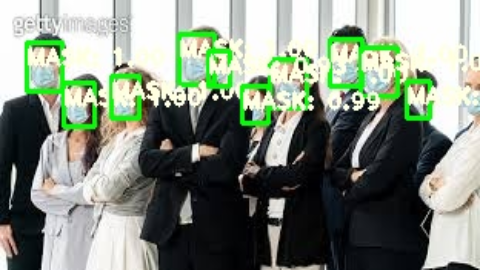

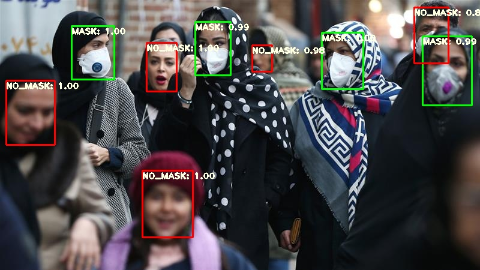

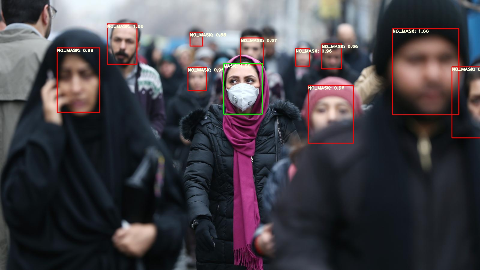

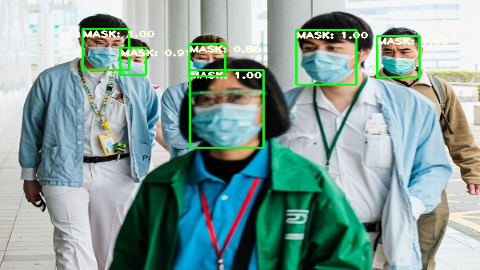

In [7]:
output_path = './testing/output/images'
for img in os.listdir(output_path):
    img_raw = cv2.imread(os.path.join(output_path, img))
    img_raw = cv2.resize(img_raw, (480, 270))  
    cv2_imshow(img_raw)

# WebCam으로 동영상 녹화 후 detecting 하기

동영상 녹화 후 detecting은 구글 드라이브 공유 폴더 내에서 진행이 불가능하다. 공유된 폴더를 다운 받은 후, 다시 개인의 드라이브에 올려 진행하여야한다.

## 동영상 녹화

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename='./testing/input/videos/video.mp4'):

  # This function uses the take_photo() function provided by the Colab team as a  
  # starting point, along with a bunch of stuff from Stack overflow, and some sample code 
  # from: https://developer.mozilla.org/enUS/docs/Web/API/MediaStream_Recording_API

  js = Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename

In [ ]:
# Run the function, get the video path as saved in your notebook, and play it back here.
from IPython.display import HTML
from base64 import b64encode

video_width = 300

video_path = record_video()
video_file = open(video_path, "r+b").read()

video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

## MASK Detecting

In [ ]:
from __future__ import division

from models import Darknet
from utils.utils import load_classes,non_max_suppression_output
from google.colab.patches import cv2_imshow
import argparse

import time
import cv2
import os
import torch
import numpy as np
from torch.autograd import Variable
import easydict

if __name__ == "__main__":

    opt = easydict.EasyDict({ 
    'input_file_path': "./testing/input/videos/video.mp4", 
    'model_def': "config/yolov3_mask.cfg",
    'weights_path': "checkpoints/yolov3_ckpt_40.pth",
    'class_path': "data/mask_dataset.names",
    'conf_thres': 0.9,
    'nms_thres': 0.4,
    'frame_size': 416,
    'save_video': True,
    'output_path': "./testing/output/videos"
    })
    print(opt)

    # Output directory
    os.makedirs(opt.output_path, exist_ok=True)

    # checking for GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set up model
    model = Darknet(opt.model_def, img_size=opt.frame_size).to(device)

    # loading weights
    if opt.weights_path.endswith(".weights"):
        model.load_darknet_weights(opt.weights_path)  # Load weights
    else:
        model.load_state_dict(torch.load(opt.weights_path))  # Load checkpoints

    # Set in evaluation mode
    model.eval()

    # Extracts class labels from file
    classes = load_classes(opt.class_path)

    # ckecking for GPU for Tensor
    Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

    # camara capture
    cap = cv2.VideoCapture(opt.input_file_path)
    assert cap.isOpened(), 'Cannot capture source'

    # Video feed dimensions
    _, frame = cap.read()
    v_height, v_width = frame.shape[:2]

    # print(v_height,v_width)

    # Output saving
    if(opt.save_video):
        fourcc = cv2.VideoWriter_fourcc(*'MP4V')

        filename = opt.input_file_path.split("/")[-1]
        filepath = os.path.join(opt.output_path,filename)

        #fps = cap.get(cv2.CAP_PROP_FPS)
        out = cv2.VideoWriter(filepath, fourcc, 25, (v_width, v_height))

    print("\nPerforming object detection:")

    # For a black image
    x = y = v_height if v_height > v_width else v_width

    # Putting original image into black image
    start_new_i_height = int((y - v_height) / 2)
    start_new_i_width = int((x - v_width) / 2)

    # For accommodate results in original frame
    mul_constant = x / opt.frame_size
    # print(mul_constant)

    # for text in output
    t_size = cv2.getTextSize(" ", cv2.FONT_HERSHEY_PLAIN, 1, 1)[0]

    frames = fps = 0
    start = time.time()

    while _:

        # frame extraction => resizing => [BGR -> RGB] => [[0...255] -> [0...1]] => [[3, 416, 416] -> [416, 416, 3]]
        #                       => [[416, 416, 3] => [416, 416, 3, 1]] => [np_array -> tensor] => [tensor -> variable]

        # frame extraction
        _, org_frame = cap.read()
        # resizing to [416 x 416]
        if not _:
          break

        # Black image
        frame = np.zeros((x, y, 3), np.uint8)

        frame[start_new_i_height: (start_new_i_height + v_height),start_new_i_width: (start_new_i_width + v_width)] = org_frame

        # resizing to [416x 416]
        frame = cv2.resize(frame, (opt.frame_size, opt.frame_size))
        # [BGR -> RGB]
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # [[0...255] -> [0...1]]
        frame = np.asarray(frame) / 255
        # [[3, 416, 416] -> [416, 416, 3]]
        frame = np.transpose(frame, [2, 0, 1])
        # [[416, 416, 3] => [416, 416, 3, 1]]
        frame = np.expand_dims(frame, axis=0)
        # [np_array -> tensor]
        frame = torch.Tensor(frame)

        # plt.imshow(frame[0].permute(1,2,0))
        # plt.show()

        # [tensor -> variable]
        frame = Variable(frame.type(Tensor))

        # Get detections
        with torch.no_grad():
            detections = model(frame)
        detections = non_max_suppression_output(detections, opt.conf_thres, opt.nms_thres)

        # For each detection in detections
        detection = detections[0]
        if detection is not None:

            for x1, y1, x2, y2, conf, cls_conf, cls_pred in detection:

                # Accommodate bounding box in original frame
                x1 = int(x1 * mul_constant - start_new_i_width)
                y1 = int(y1 * mul_constant - start_new_i_height)
                x2 = int(x2 * mul_constant - start_new_i_width)
                y2 = int(y2 * mul_constant - start_new_i_height)

                # Bounding box making and setting Bounding box title
                if (int(cls_pred) == 0):
                    # WITH_MASK
                    cv2.rectangle(org_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                else:
                    # WITHOUT_MASK
                    cv2.rectangle(org_frame, (x1, y1), (x2, y2), (0, 0, 255), 2)

                cv2.putText(org_frame, classes[int(cls_pred)] + ": %.2f" % conf, (x1, y1 + t_size[1] + 4),
                            cv2.FONT_HERSHEY_PLAIN, 1,
                            [225, 255, 255], 2)


        # FPS PRINTING
        # cv2.rectangle(org_frame, (0, 0), (175, 20), (0, 0, 0), -1)
        # cv2.putText(org_frame,"FPS : %3.2f" % (fps), (0, t_size[1] + 4),
        #             cv2.FONT_HERSHEY_PLAIN, 1,
        #             [255, 255, 255], 1)

        frames += 1
        fps = frames / (time.time() - start)

        # cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
        # cv2.setWindowProperty('frame', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

        if (opt.save_video):
            out.write(org_frame)

        #cv2_imshow(org_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    if (opt.save_video):
        out.release()

    cap.release()
    cv2.destroyAllWindows()

{'input_file_path': './testing/input/videos/video.mp4', 'model_def': 'config/yolov3_mask.cfg', 'weights_path': 'checkpoints/yolov3_ckpt_35.pth', 'class_path': 'data/mask_dataset.names', 'conf_thres': 0.9, 'nms_thres': 0.4, 'frame_size': 416, 'save_video': True, 'output_path': './testing/output/videos'}

Performing object detection:


testing/output/videos 경로로 가면 생성된 video를 확인할 수 있다.